In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
#Importing the dataset

leads_scoring = pd.read_csv("Leads.csv")


In [3]:
#Finding the top 5 data

leads_scoring.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking the rows and columns of the dataset

leads_scoring.shape

(9240, 37)

In [5]:
#checking the data types

leads_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Describing the dataset

leads_scoring.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Checking the duplicate values in Prospect ID and Lead Number

leads_scoring.duplicated(subset=['Prospect ID','Lead Number']).sum()

0

In [8]:
#EDA
#Data Cleaning - we are dropping the Lead Number and Prospect ID since they have all unique values

leads_scoring.drop(['Prospect ID', 'Lead Number'],axis = 1, inplace = True)

In [9]:
leads_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [10]:
#Replacing the "select" value to NaN

leads_scoring = leads_scoring.replace('Select', np.nan)

In [11]:
leads_scoring.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
#Checking null values in each rows

leads_scoring.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
#Percentage of null values in each columns

leads_scoring.isnull().sum() * 100 / len(leads_scoring)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [14]:
#Dropping columns with more than 45% of missing values

cols=leads_scoring.columns

for i in cols:
    if((100*(leads_scoring[i].isnull().sum()/len(leads_scoring.index))) >= 45):
        leads_scoring.drop(i, 1, inplace = True)

In [15]:
#Checking the null values percentage

leads_scoring.isnull().sum() * 100 / len(leads_scoring)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [16]:
#Checking the counts of column country

leads_scoring['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Germany                    4
Canada                     4
South Africa               4
Nigeria                    4
Sweden                     3
Uganda                     2
Ghana                      2
Philippines                2
Asia/Pacific Region        2
Italy                      2
Belgium                    2
Netherlands                2
China                      2
Bangladesh                 2
Liberia                    1
Sri Lanka                  1
Malaysia                   1
Russia                     1
Vietnam                    1
Kenya         

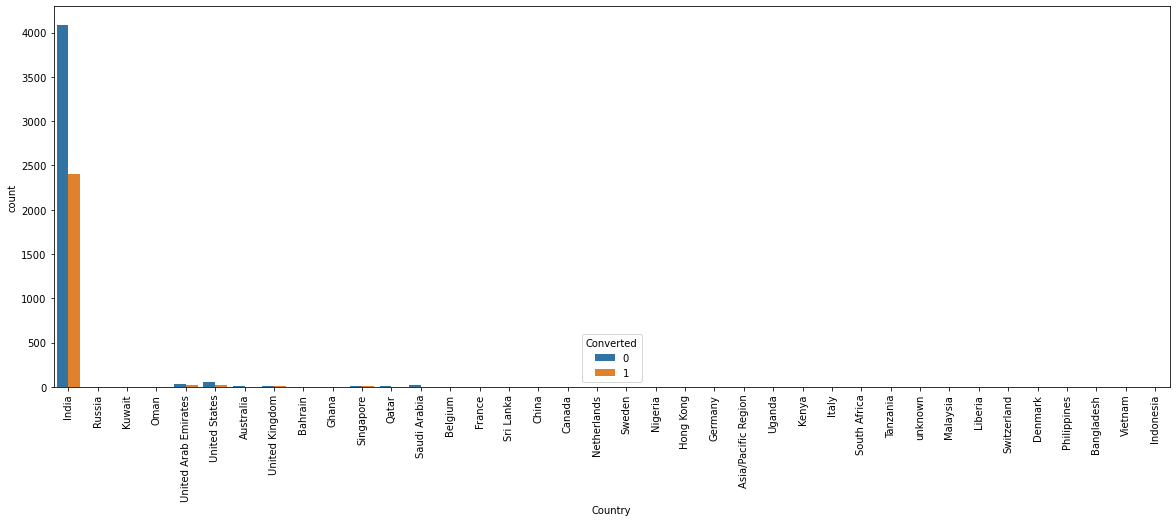

In [17]:
#plotting the Country columnn

plt.figure(figsize=(20,7))
S=sns.countplot(leads_scoring.Country, hue=leads_scoring.Converted)
S.set_xticklabels(S.get_xticklabels(),rotation=90)
plt.show()

In [18]:
#Since, India is the most occurance country in dataset, we can replace all NaN with India

leads_scoring['Country'] = leads_scoring['Country'].replace(np.nan,'India')

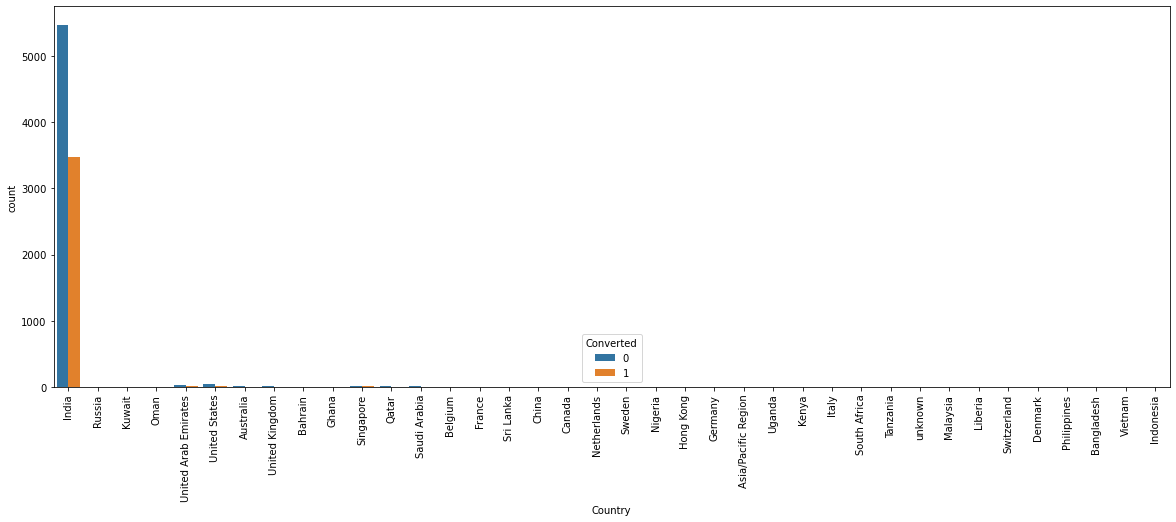

In [19]:
#plotting the Country columnn after replacing NaN with India

plt.figure(figsize=(20,7))
S=sns.countplot(leads_scoring.Country, hue=leads_scoring.Converted)
S.set_xticklabels(S.get_xticklabels(),rotation=90)
plt.show()

In [20]:
#Number of Values for India are quite high, this column can be dropped
#Creating a list of columns to be drop

cols_to_drop=['Country']

In [21]:
#checking value of "City" column

leads_scoring['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
#Replacing the NaN with Mumbai

leads_scoring['City'] = leads_scoring['City'].replace(np.nan,'Mumbai')

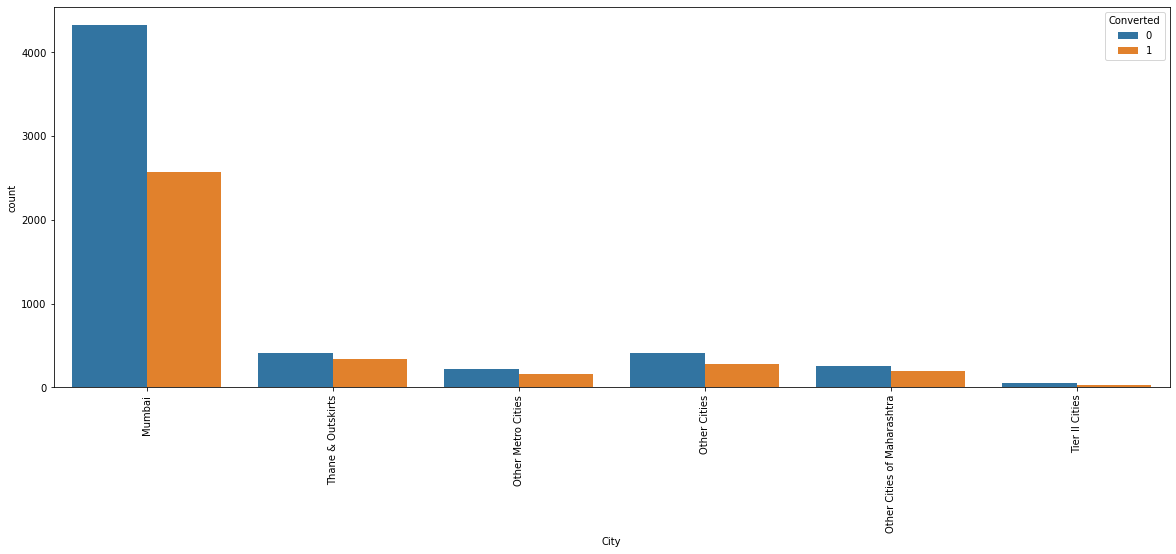

In [23]:
#plotting the City columnn after replacing NaN values

plt.figure(figsize=(20,7))
S=sns.countplot(leads_scoring.City, hue=leads_scoring.Converted)
S.set_xticklabels(S.get_xticklabels(),rotation=90)
plt.show()

In [24]:
#checking the counts of Specialization column

leads_scoring['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
#Since we are not aware why specialization is not mentioned, we will replace NaN with "Undefined"

leads_scoring['Specialization'] = leads_scoring['Specialization'].replace(np.nan, 'Undefined')

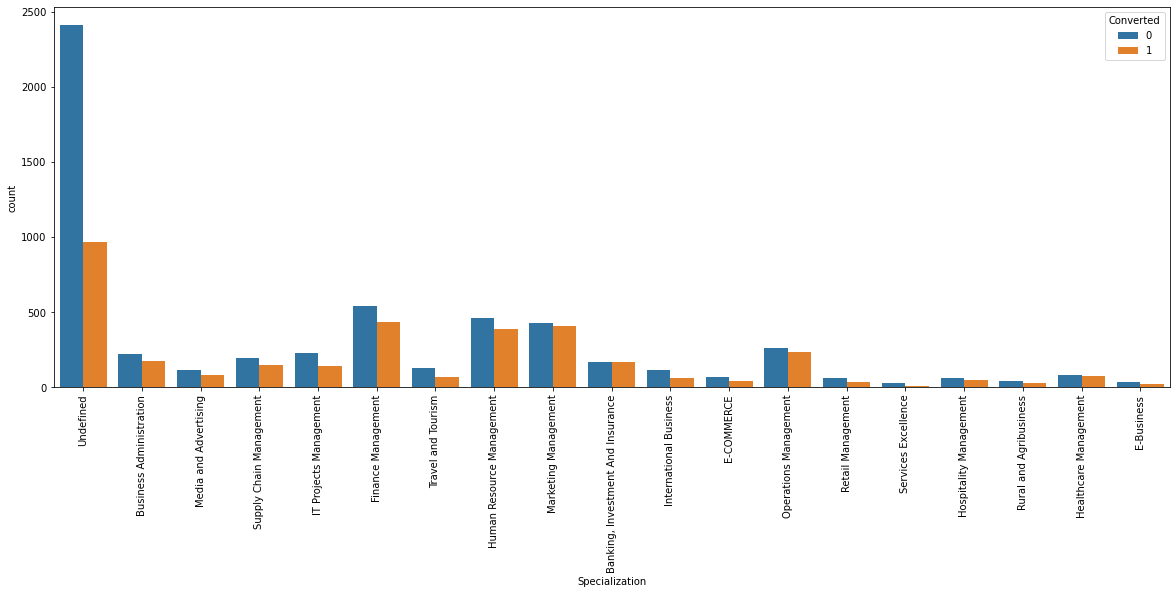

In [26]:
#plotting Specialization columnn 

plt.figure(figsize=(20,7))
S=sns.countplot(leads_scoring.Specialization, hue=leads_scoring.Converted)
S.set_xticklabels(S.get_xticklabels(),rotation=90)
plt.show()

In [27]:
#We notice that specialization with Management in them have higher number of leads as well as leads converted.
#Combining Management Specializations together

leads_scoring['Specialization'] = leads_scoring['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                            'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

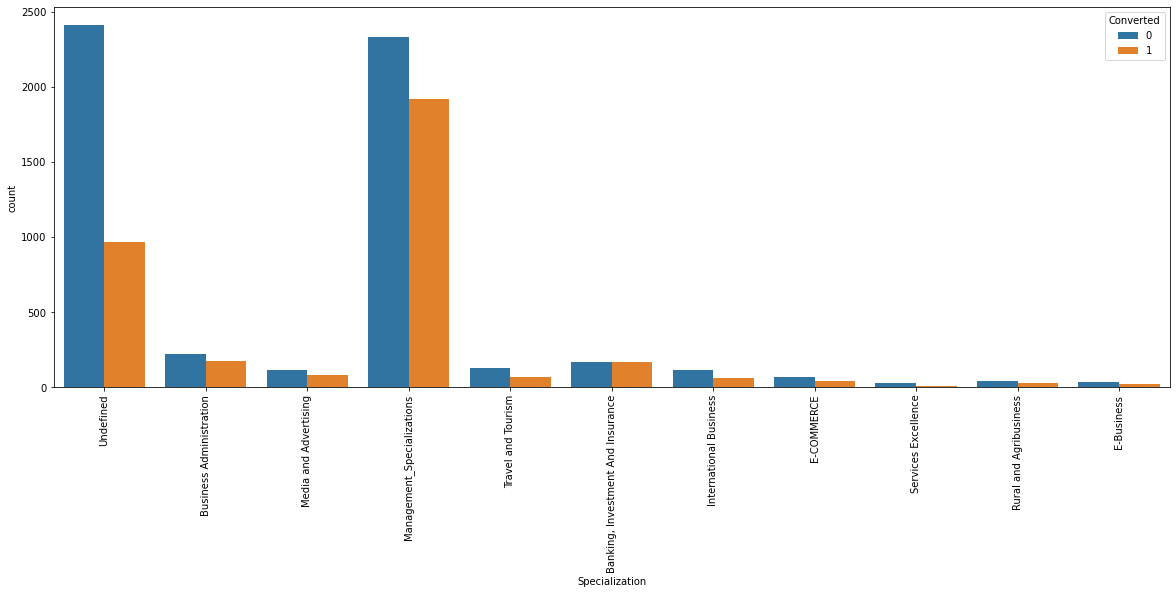

In [28]:
#visualizing specialization variables based on the converted values

plt.figure(figsize=(20,7))
S=sns.countplot(leads_scoring.Specialization, hue=leads_scoring.Converted)
S.set_xticklabels(S.get_xticklabels(),rotation=90)
plt.show()


In [29]:
#Occupation details

leads_scoring['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
#Imputing NaN values with mode "Unemployed"

leads_scoring['What is your current occupation'] = leads_scoring['What is your current occupation'].replace(np.nan, 'Unemployed')

In [31]:
#Checking occupation counts of values

leads_scoring['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

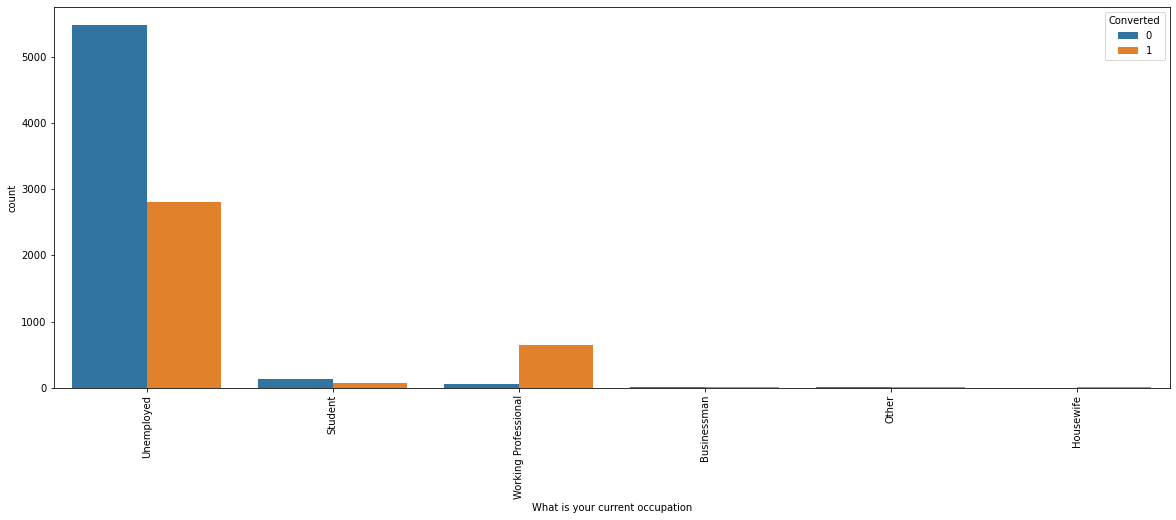

In [32]:
#Visualization based on the current change values

plt.figure(figsize=(20,7))
S=sns.countplot(leads_scoring['What is your current occupation'], hue=leads_scoring.Converted)
S.set_xticklabels(S.get_xticklabels(),rotation=90)
plt.show()

In [33]:
#Checking value counts

leads_scoring['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
#Replacing NaN values with Mode "Better Career Prospects"

leads_scoring['What matters most to you in choosing a course'] = leads_scoring['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

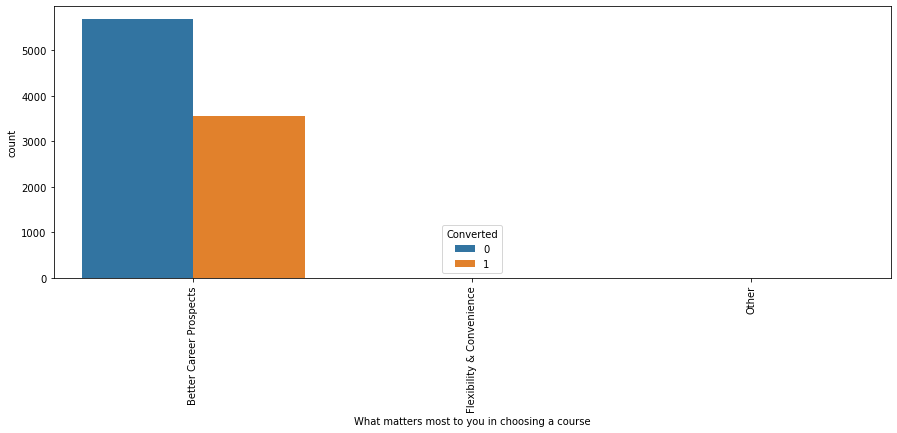

In [35]:
#Visualization based on the current change values

plt.figure(figsize=(15,5))
S=sns.countplot(leads_scoring['What matters most to you in choosing a course'], hue=leads_scoring.Converted)
S.set_xticklabels(S.get_xticklabels(),rotation=90)
plt.show()

In [36]:
#Checking value counts of variable
leads_scoring['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [37]:
#This columns can be dropped, so appending with the drop list

cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [38]:
#Checking counts of Tag columns

leads_scoring['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [39]:
#Replacing NaN values with "Undefined"

leads_scoring['Tags'] = leads_scoring['Tags'].replace(np.nan,'Undefined')

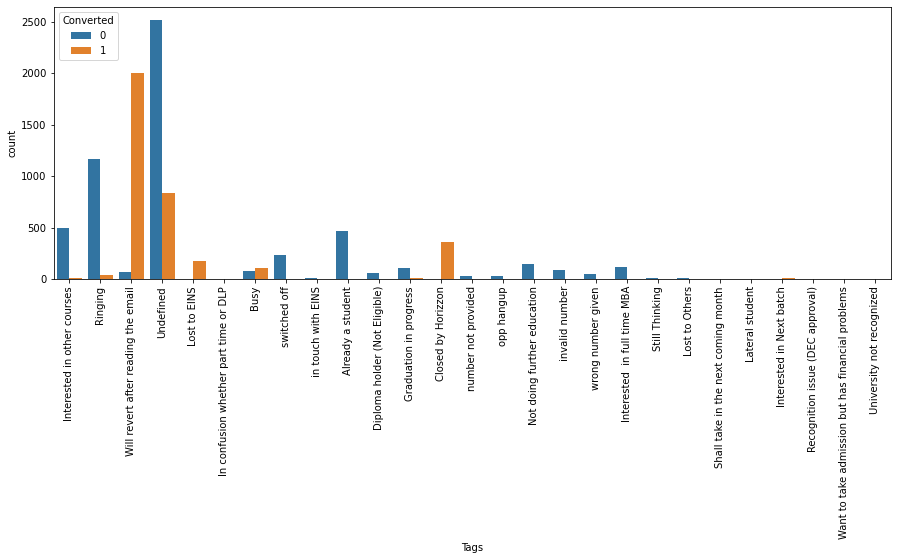

In [40]:
#Visualization based on the current change values

plt.figure(figsize=(15,5))
S=sns.countplot(leads_scoring['Tags'], hue=leads_scoring.Converted)
S.set_xticklabels(S.get_xticklabels(),rotation=90)
plt.show()

In [41]:
#Replacing tags with low frequency with "Other Tags"

leads_scoring['Tags'] = leads_scoring['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads_scoring['Tags'] = leads_scoring['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [42]:
#Checking the percentage of missing values

leads_scoring.isnull().sum() * 100 / len(leads_scoring)

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [43]:
#Checking counts of Lead Source column

leads_scoring['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
welearnblog_Home        1
Pay per Click Ads       1
youtubechannel          1
testone                 1
NC_EDM                  1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

In [44]:
#Replacing Nan Values and combining low frequency values together

leads_scoring['Lead Source'] = leads_scoring['Lead Source'].replace(np.nan,'Others')
leads_scoring['Lead Source'] = leads_scoring['Lead Source'].replace('google','Google')
leads_scoring['Lead Source'] = leads_scoring['Lead Source'].replace('Facebook','Social Media')
leads_scoring['Lead Source'] = leads_scoring['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')  

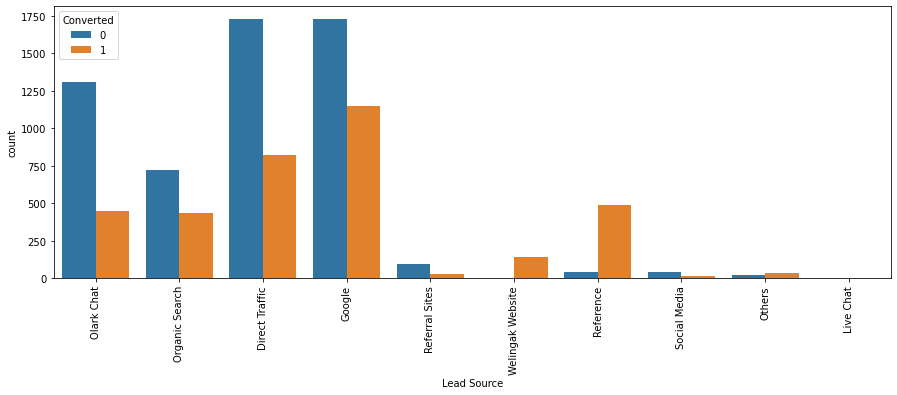

In [45]:
#Visualizing of Variable based on Converted value

plt.figure(figsize=(15,5))
S=sns.countplot(leads_scoring['Lead Source'], hue=leads_scoring.Converted)
S.set_xticklabels(S.get_xticklabels(),rotation=90)
plt.show()

In [46]:
# Analysising the Last Activity column:

leads_scoring['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [47]:
#Replacing Nan Values and combining low frequency values

leads_scoring['Last Activity'] = leads_scoring['Last Activity'].replace(np.nan,'Others')
leads_scoring['Last Activity'] = leads_scoring['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [48]:
# Analsysing the Last Activity column:

leads_scoring['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [49]:
#Checking the percentage of missing values

leads_scoring.isnull().sum() * 100 / len(leads_scoring)

Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [50]:
#Drop rows which have NaN Values. The number of Dropped rows is less than 2%, it will not affect the model

leads_scoring = leads_scoring.dropna()

In [51]:
#Checking the percentage of missing values

leads_scoring.isnull().sum() * 100 / len(leads_scoring)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [52]:
#Analysing the Lead Origin

leads_scoring['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

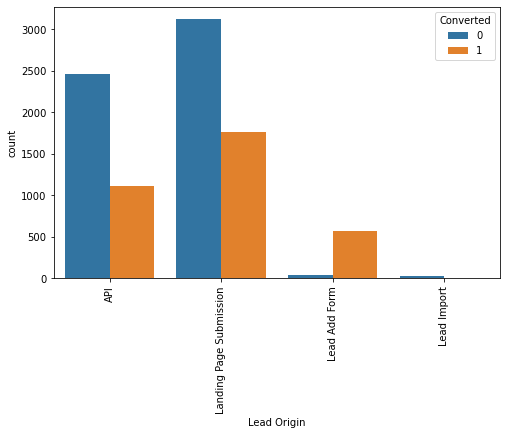

In [53]:
#Visualizing of Variable based on Converted value

plt.figure(figsize=(8,5))
S=sns.countplot(leads_scoring['Lead Origin'], hue=leads_scoring.Converted)
S.set_xticklabels(S.get_xticklabels(),rotation=90)
plt.show()

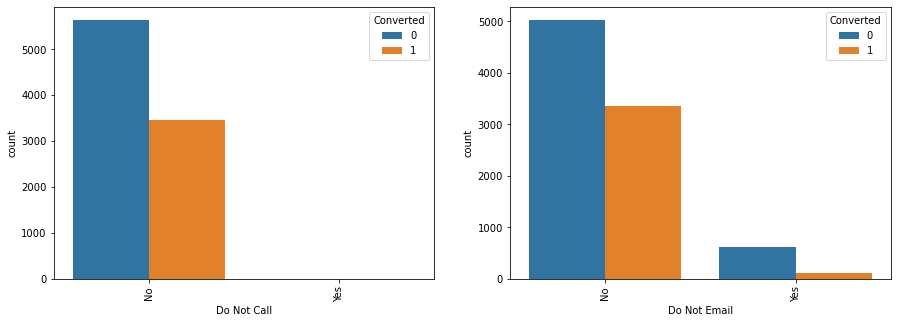

In [54]:
#Analysing the Do Not Email & Do Not Call columns
#Visualizing of Variable based on Converted value

plt.figure(figsize=(15,5))

S=plt.subplot(1, 2, 1)
S=sns.countplot(leads_scoring['Do Not Call'], hue=leads_scoring.Converted)
S.set_xticklabels(S.get_xticklabels(),rotation=90)

S1=plt.subplot(1, 2, 2)
S1=sns.countplot(leads_scoring['Do Not Email'], hue=leads_scoring.Converted)
S1.set_xticklabels(S1.get_xticklabels(),rotation=90)
plt.show()

In [55]:
#Checking counts for Do Not Call columns

leads_scoring['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [56]:
#Checking counts for Do Not Email columns

leads_scoring['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [57]:
#Dropping the Do Not Call Column from the list since > 90% is of having only one Value

cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [58]:
leads_scoring.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [59]:
leads_scoring.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [60]:
leads_scoring['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [61]:
leads_scoring['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [62]:
leads_scoring['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [63]:
leads_scoring['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [64]:
leads_scoring['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [65]:
leads_scoring['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [66]:
leads_scoring['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [67]:
leads_scoring['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [68]:
leads_scoring['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [69]:
leads_scoring['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [70]:
#Adding imbalanced columns to the list to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [71]:
#Checking counts of last Notable Activity columns

leads_scoring['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Form Submitted on Website          1
View in browser link Clicked       1
Approached upfront                 1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [72]:
#Combining lower frequency values

leads_scoring['Last Notable Activity'] = leads_scoring['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

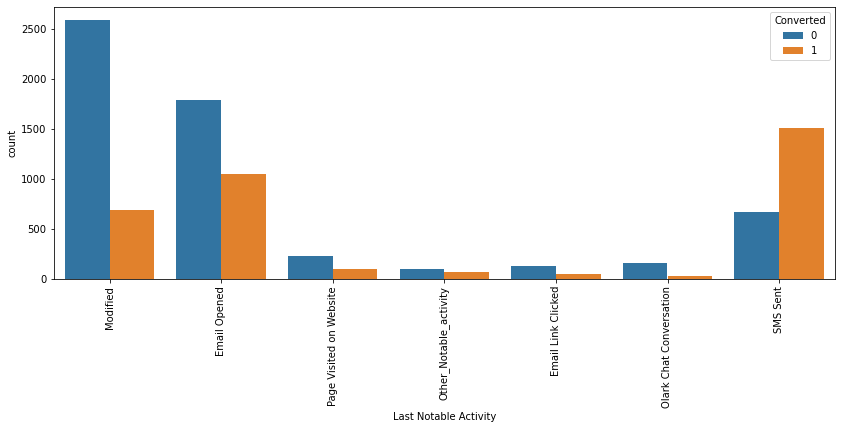

In [73]:
#Visualizing of Variable based on Converted value

plt.figure(figsize = (14,5))
S=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_scoring)
S.set_xticklabels(S.get_xticklabels(),rotation=90)
plt.show()

In [74]:
#Checking counts

leads_scoring['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

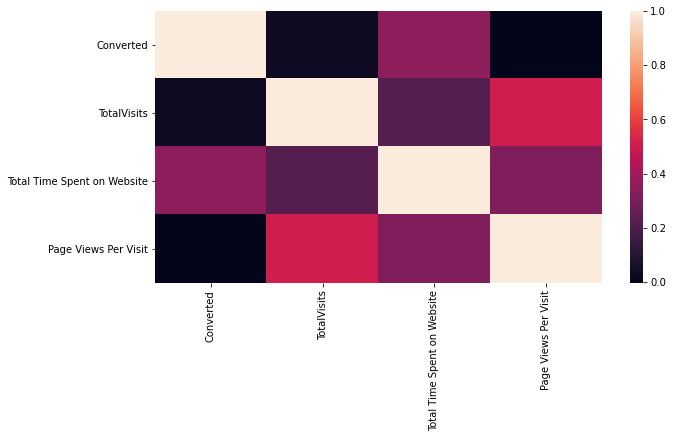

In [75]:
# To check the correlation among varibles

plt.figure(figsize=(10,5))
sns.heatmap(leads_scoring.corr())
plt.show()

In [76]:
#List of columns to be dropped

cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [77]:
#Dropping columns

leads_scoring = leads_scoring.drop(cols_to_drop,1)
leads_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

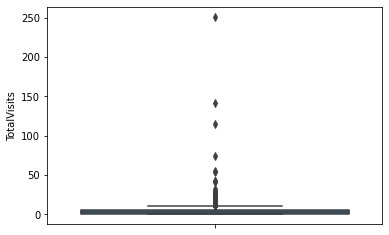

In [78]:
#VisualizingTotal Visits

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_scoring['TotalVisits'])
plt.show()

In [79]:
#Checking percentile values for "Total Visits"

leads_scoring['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

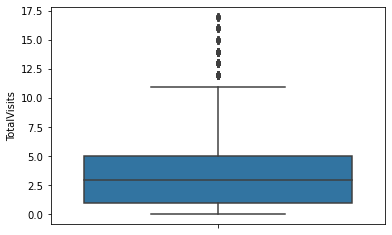

In [80]:
#Outlier:Removing top & bottom 1% of the Column Outlier values

Q3 = leads_scoring.TotalVisits.quantile(0.99)
leads_scoring = leads_scoring[(leads_scoring.TotalVisits <= Q3)]
Q1 = leads_scoring.TotalVisits.quantile(0.01)
leads_scoring = leads_scoring[(leads_scoring.TotalVisits >= Q1)]
sns.boxplot(y=leads_scoring['TotalVisits'])
plt.show()

In [81]:
leads_scoring.shape

(9020, 14)

In [82]:
#Checking percentiles for nex numeric column of "Total Time Spent on Website"

leads_scoring['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

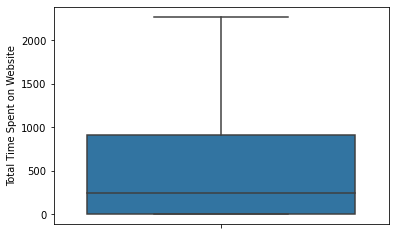

In [83]:
#Visualizing of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_scoring['Total Time Spent on Website'])
plt.show()

In [84]:
#Checking of "Page Views Per Visit"

leads_scoring['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

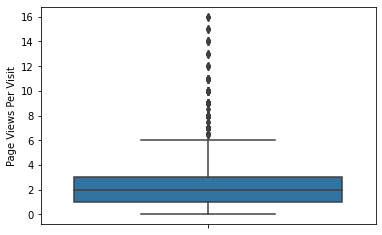

In [85]:
#Visualizing of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_scoring['Page Views Per Visit'])
plt.show()

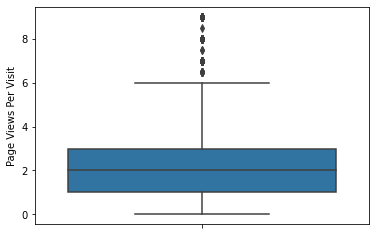

In [86]:
#Outlier: Removing top & bottom 1% 

Q3 = leads_scoring['Page Views Per Visit'].quantile(0.99)
leads_scoring = leads_scoring[leads_scoring['Page Views Per Visit'] <= Q3]
Q1 = leads_scoring['Page Views Per Visit'].quantile(0.01)
leads_scoring = leads_scoring[leads_scoring['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads_scoring['Page Views Per Visit'])
plt.show()

In [87]:
leads_scoring.shape

(8953, 14)

In [88]:
#Checking the percentage of missing values

leads_scoring.isnull().sum() * 100 / len(leads_scoring)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

# Dummy Variable Creation:

In [89]:
#Getting a list of categorical columns

cat_cols= leads_scoring.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [90]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads_scoring[varlist] = leads_scoring[varlist].apply(binary_map)

In [91]:
dummy = pd.get_dummies(leads_scoring[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads_scoring = pd.concat([leads_scoring,dummy],1)

In [92]:
dummy = pd.get_dummies(leads_scoring[['Specialization']], drop_first=True)

leads_scoring = pd.concat([leads_scoring,dummy],1)

In [93]:
dummy = pd.get_dummies(leads_scoring['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads_scoring = pd.concat([leads_scoring, dummy], axis = 1)

In [94]:
dummy = pd.get_dummies(leads_scoring['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads_scoring = pd.concat([leads_scoring, dummy], axis = 1)

In [95]:
dummy = pd.get_dummies(leads_scoring['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads_scoring = pd.concat([leads_scoring, dummy], axis = 1)

In [96]:
dummy = pd.get_dummies(leads_scoring[['Tags']], drop_first=True)

leads_scoring = pd.concat([leads_scoring,dummy],1)

In [97]:
#Dropping the original columns after dummy variable creation

leads_scoring.drop(cat_cols,1,inplace = True)

In [98]:
leads_scoring.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Undefined,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Train-Test Split & Logistic Regression Model Building:

In [99]:
from sklearn.model_selection import train_test_split

y = leads_scoring['Converted']
y.head()
X=leads_scoring.drop('Converted', axis=1)

In [100]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

In [102]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Undefined,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [103]:
import statsmodels.api as sm

In [104]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [105]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True])

In [106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('What is your current occupation_Housewife', False, 33),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 26),
 ('What is your current occupation_Unemployed', False, 19),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 21),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 39),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 32),
 ('Specialization_Business Administration', False, 24),
 ('Specialization_E-Business', False, 36),
 ('Specialization_E-COMMERCE', False, 41),
 ('Specialization_International Business', False, 22),
 ('Specialization_Management_Specializations', False, 2

In [107]:
#List of RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [108]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Specialization_Undefined',
       'Lead Source_Google', 'Lead Source_

In [109]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Mon, 04 Oct 2021   Deviance:                       2509.3
Time:                        17:17:09   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

In [110]:
#Dropping column with high p-value

col = col.drop('Lead Source_Referral Sites',1)

In [111]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Mon, 04 Oct 2021   Deviance:                       2510.7
Time:                        17:17:09   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

In [112]:
# Check for the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


In [114]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Mon, 04 Oct 2021   Deviance:                       2510.7
Time:                        17:17:10   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


In [116]:
# Getting the Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.295345
4696    0.032852
3274    0.617801
2164    0.007975
1667    0.987238
7024    0.120820
8018    0.024302
778     0.139180
6942    0.003322
4440    0.089262
dtype: float64

In [117]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29534528, 0.03285235, 0.6178014 , 0.00797479, 0.98723783,
       0.12082046, 0.02430221, 0.13918024, 0.00332173, 0.08926236])

In [118]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.295345,9196
1,0,0.032852,4696
2,0,0.617801,3274
3,0,0.007975,2164
4,1,0.987238,1667


In [119]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.295345,9196,0
1,0,0.032852,4696,0
2,0,0.617801,3274,1
3,0,0.007975,2164,0
4,1,0.987238,1667,1


In [120]:
from sklearn import metrics

# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3701  181]
 [ 286 2099]]


In [121]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9254826870911121


In [122]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [123]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.880083857442348

In [124]:
# Let us calculate specificity

TN / float(TN+FP)

0.9533745492014426

In [125]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.04662545079855744


In [126]:
# positive predictive value 

print (TP / float(TP+FP))

0.9206140350877193


In [127]:
# Negative predictive value

print (TN / float(TN+ FN))

0.928266867318786


# PLOTTING ROC CURVE

In [128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [129]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

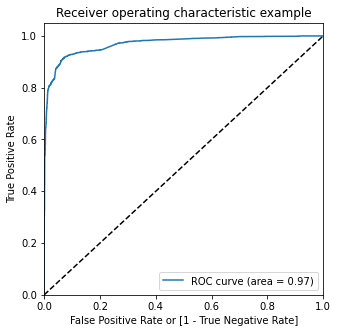

In [130]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [131]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.295345,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.032852,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.617801,3274,1,1,1,1,1,1,1,1,0,0,0
3,0,0.007975,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.987238,1667,1,1,1,1,1,1,1,1,1,1,1


In [132]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.819531  0.973166  0.725142
0.2   0.2  0.908728  0.929979  0.895672
0.3   0.3  0.923408  0.916981  0.927357
0.4   0.4  0.925164  0.898952  0.941267
0.5   0.5  0.925483  0.880084  0.953375
0.6   0.6  0.915111  0.830189  0.967285
0.7   0.7  0.914792  0.810482  0.978877
0.8   0.8  0.910962  0.786583  0.987378
0.9   0.9  0.889102  0.724528  0.990211


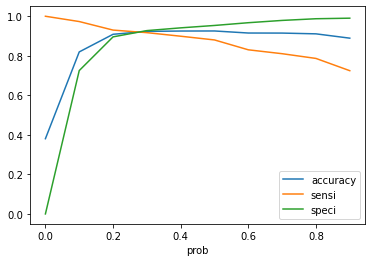

In [133]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [134]:
#From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.295345,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.032852,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.617801,3274,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.007975,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.987238,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [135]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.295345,9196,0,30
1,0,0.032852,4696,0,3
2,0,0.617801,3274,1,62
3,0,0.007975,2164,0,1
4,1,0.987238,1667,1,99


In [136]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9234083293441838

In [137]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3600,  282],
       [ 198, 2187]], dtype=int64)

In [138]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [139]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.9169811320754717

In [140]:
# Let us calculate specificity

TN / float(TN+FP)

0.9273570324574961

# Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

Accuracy : 92.29%
Sensitivity : 91.70%
Specificity : 92.66%

In [141]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.07264296754250386


In [142]:
# Positive predictive value 

print (TP / float(TP+FP))

0.8857837181044957


In [143]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9478672985781991


In [144]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3600,  282],
       [ 198, 2187]], dtype=int64)

In [145]:
# Precision

TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8857837181044957

In [146]:
# Recall

TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9169811320754717

In [147]:
from sklearn.metrics import precision_score, recall_score

In [148]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8857837181044957

In [149]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9169811320754717

In [150]:
from sklearn.metrics import precision_recall_curve

In [151]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

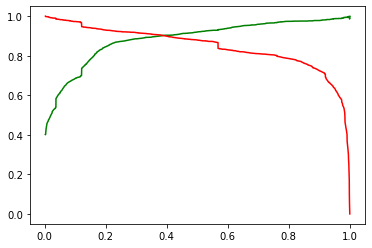

In [152]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [153]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Undefined,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [154]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,1,0,1,0,0,1,0,0,0,0,1,0
984,-0.550262,0,0,0,1,1,0,0,0,0,0,1,0,0
8135,0.812462,0,1,0,1,0,0,1,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,0,0,1


In [155]:
X_test_sm = sm.add_constant(X_test)

# PREDICTIONS ON TEST SET

In [156]:
y_test_pred = res.predict(X_test_sm)

In [157]:
y_test_pred[:10]

7681    0.025895
984     0.015191
8135    0.723450
6915    0.004734
2712    0.944942
244     0.002817
4698    0.012590
8287    0.036213
6791    0.978399
8970    0.007065
dtype: float64

In [158]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [159]:
# Let's see the head

y_pred_1.head()

,0
7681,0.025895
984,0.015191
8135,0.723450
6915,0.004734
2712,0.944942


In [160]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [161]:
# Putting CustID to index

y_test_df['Prospect ID'] = y_test_df.index

In [162]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [164]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.025895
1,0,984,0.015191
2,0,8135,0.723450
3,0,6915,0.004734
4,1,2712,0.944942


In [165]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [166]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.025895
1,0,984,0.015191
2,0,8135,0.723450
3,0,6915,0.004734
4,1,2712,0.944942


In [167]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [168]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.025895,3
1,984,0,0.015191,2
2,8135,0,0.723450,72
3,6915,0,0.004734,0
4,2712,1,0.944942,94


In [169]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [170]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.025895,3,0
1,984,0,0.015191,2,0
2,8135,0,0.723450,72,1
3,6915,0,0.004734,0,0
4,2712,1,0.944942,94,1


In [171]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.926656738644825

In [172]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1564,  112],
       [  85,  925]], dtype=int64)

In [173]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [174]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.9158415841584159

In [175]:
# Let us calculate specificity

TN / float(TN+FP)

0.9331742243436754

In [176]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8919961427193829

In [177]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9158415841584159

# Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 92.78%
Sensitivity : 91.98%
Specificity : 93.26%


Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 92.29%
Sensitivity : 91.70%
Specificity : 92.66%
Test Data: 
Accuracy : 92.78%
Sensitivity : 91.98%
Specificity : 93.26%